In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_palette('dark')

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df.rename({'gender': 'gender', 'race/ethnicity': 'race/ethnicity', 'parental level of education': 'parental_level_of_education',
           'lunch': 'lunch', 'test preparation course': 'test_preparation_course', 'math score': 'math_score',
           'reading score': 'reading_score', 'writing score': 'writing_score'}, axis=1, inplace=True)

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
df['avg_score'] = (df.math_score + df.reading_score + df.writing_score)/3

In [12]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [13]:
cols = ['math_score', 'reading_score', 'writing_score', 'avg_score']

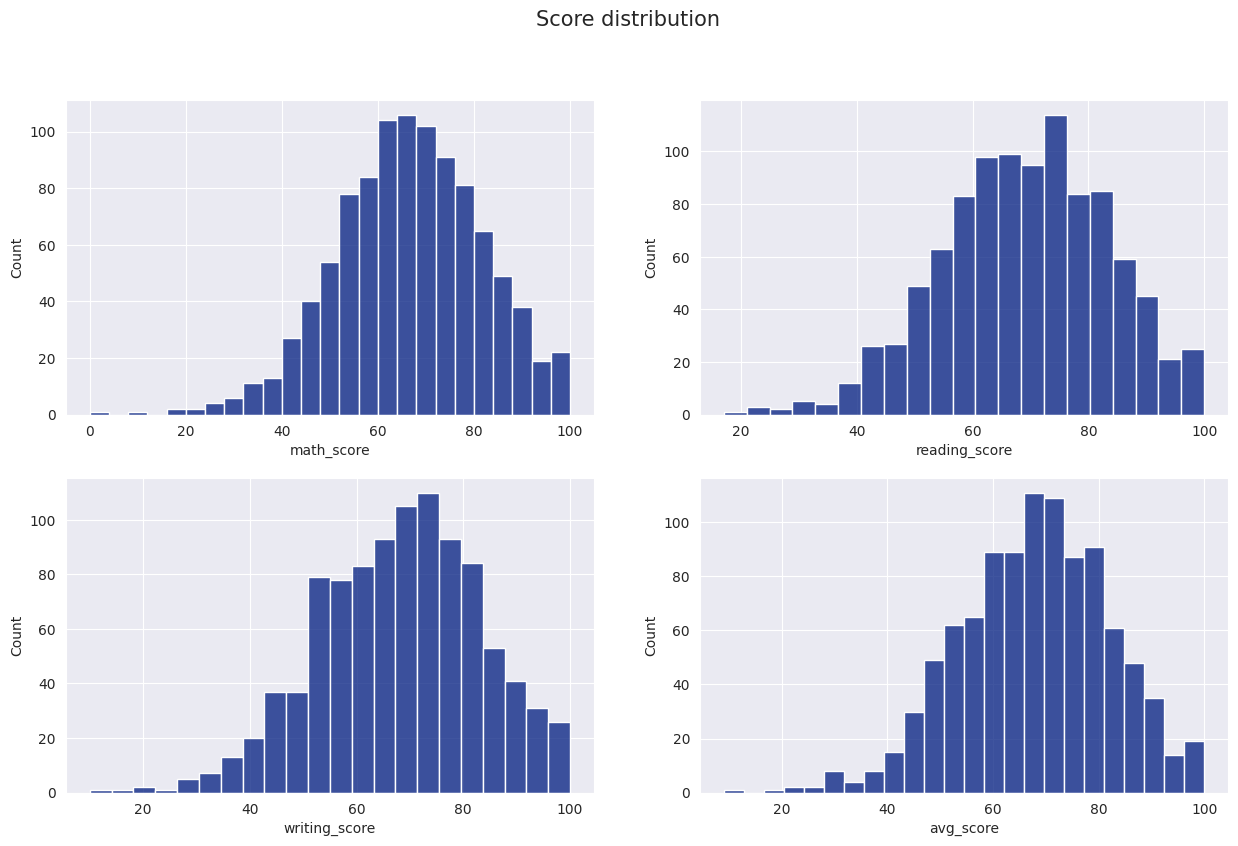

In [14]:
plt.figure(figsize=(15,9))
plt.suptitle('Score distribution', fontsize=15)

for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  ax = ax = sns.histplot(x=col, data=df)

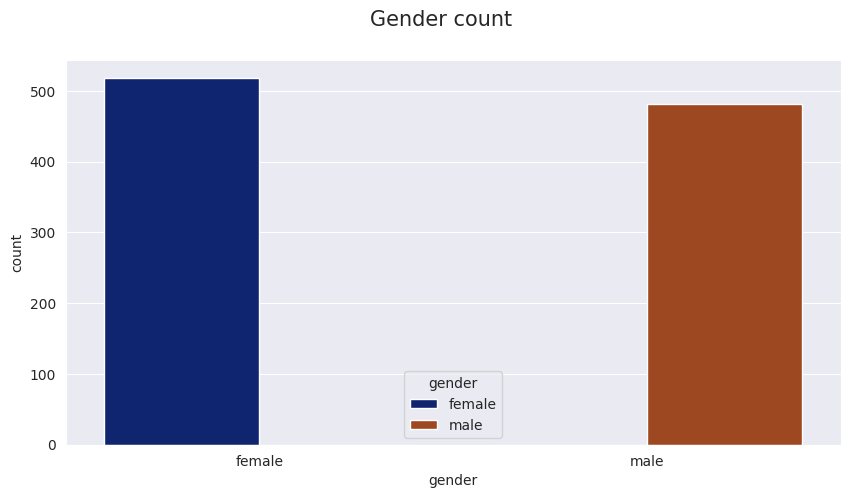

In [15]:
plt.figure(figsize=(10,5))
plt.suptitle('Gender count', fontsize=15)

ax = sns.countplot(x='gender', hue='gender', data=df)

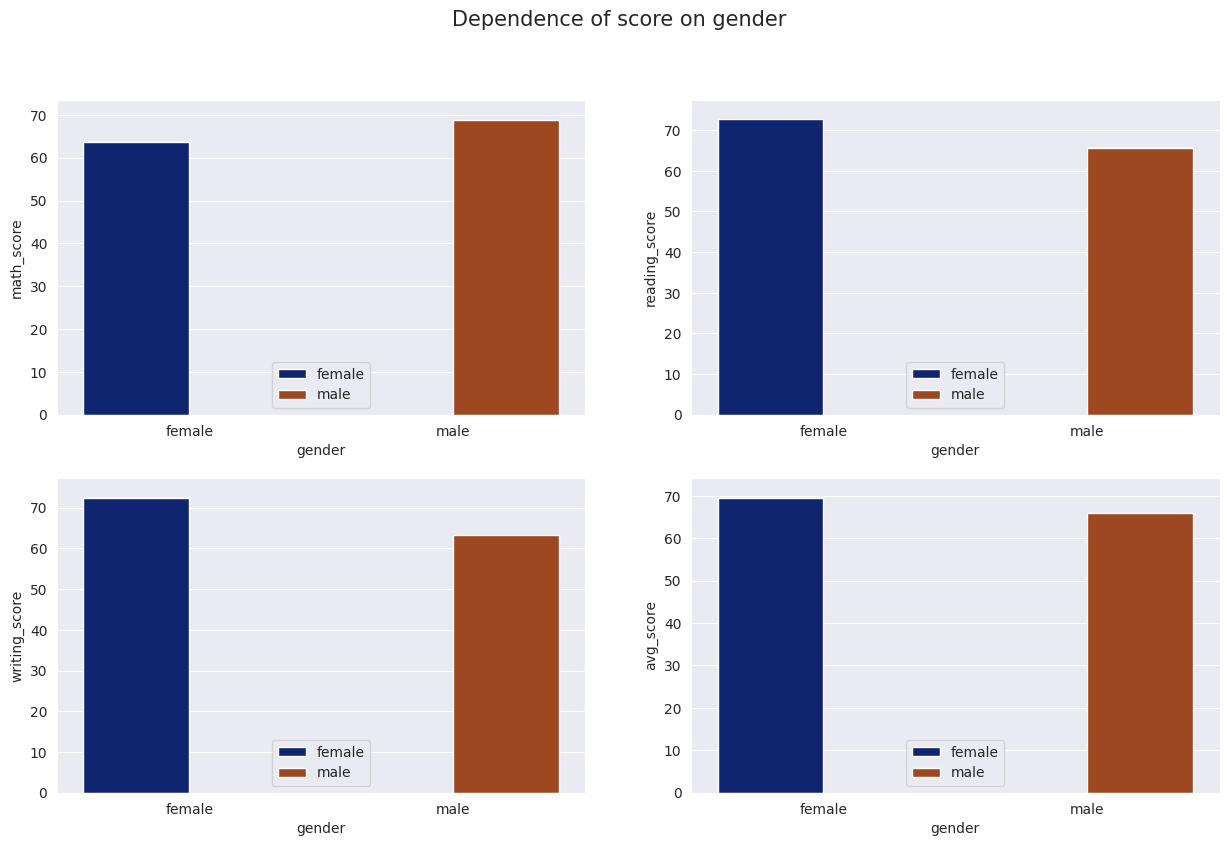

In [16]:
plt.figure(figsize=(15,9))
plt.suptitle('Dependence of score on gender', fontsize=15)

for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  ax = sns.barplot(x='gender', y=col, hue='gender', errwidth=0, data=df)
  plt.legend(loc='lower center')

In [17]:
df['race/ethnicity'].nunique()

5

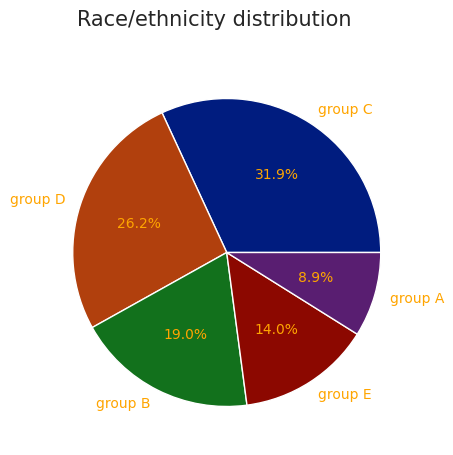

In [18]:
plt.figure(figsize=(10,5))
plt.suptitle('Race/ethnicity distribution', fontsize=15)

ax = plt.pie(df['race/ethnicity'].value_counts(), labels=list(df['race/ethnicity'].value_counts().index), autopct='%1.1f%%', textprops={'color': 'orange'})

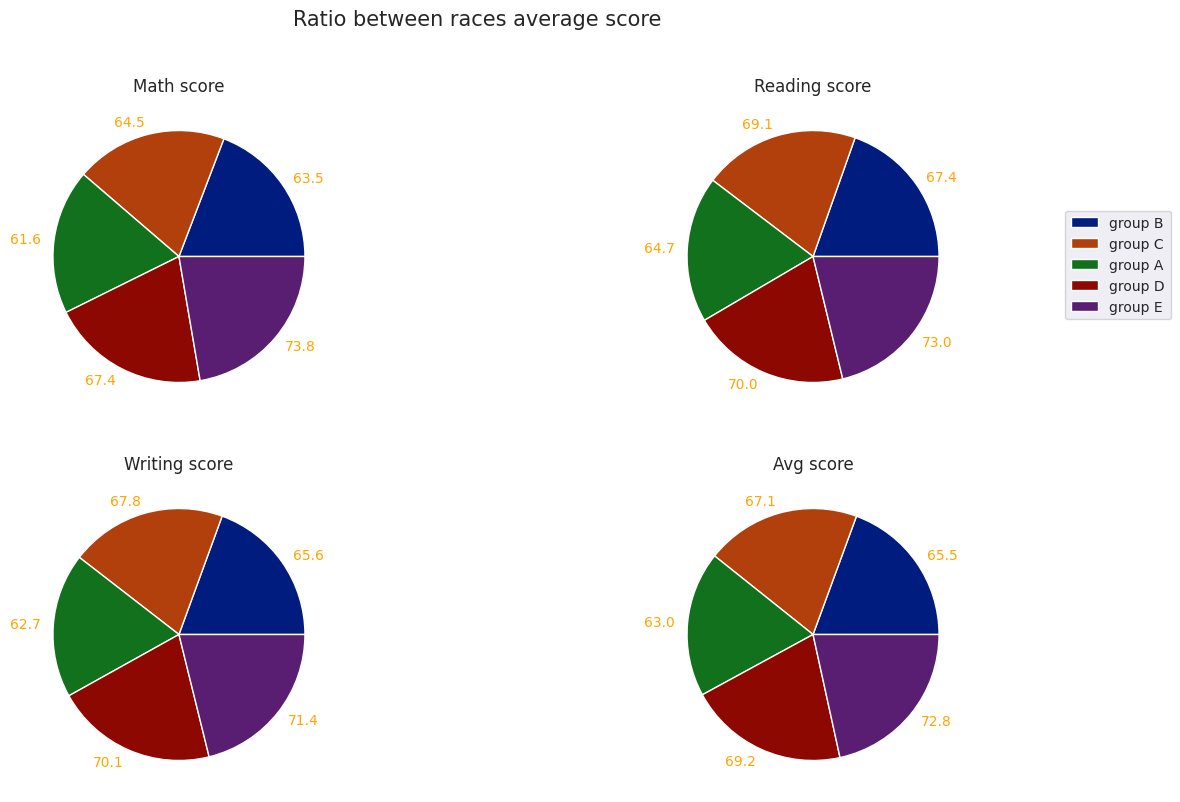

In [19]:
races = list(df['race/ethnicity'].unique())
scores = {}
for col in cols:
  values = []
  for race in races:
      avg_score = df[df['race/ethnicity'] == race][col].mean()
      values.append(float(f'{avg_score:.1f}'))
  scores[col] = values

plt.figure(figsize=(15,9))
plt.suptitle('Ratio between races average score', fontsize=15)

for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  ax = plt.pie(scores[col], labels=scores[col], textprops={'color': 'orange'})
  plt.title(col.capitalize().replace('_', ' '))

plt.legend(races, loc=(1.3,1.5))

In [20]:
df['parental_level_of_education'].nunique()

6

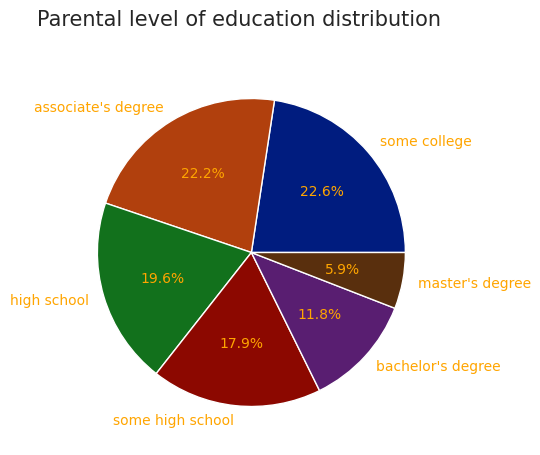

In [21]:
plt.figure(figsize=(10,5))
plt.suptitle('Parental level of education distribution', fontsize=15)

ax = plt.pie(df['parental_level_of_education'].value_counts(), labels=list(df['parental_level_of_education'].value_counts().index), autopct='%1.1f%%', textprops={'color': 'orange'})

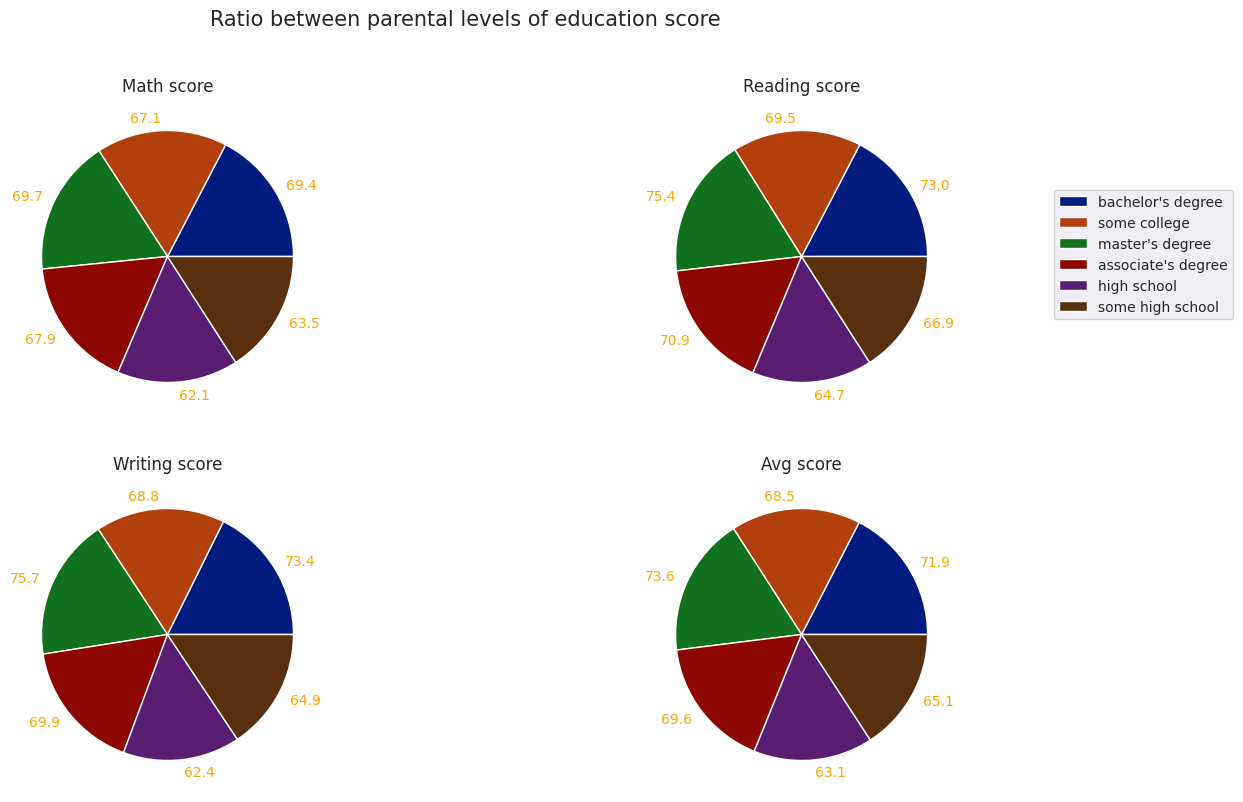

In [22]:
level_of_edu = list(df['parental_level_of_education'].unique())
scores = {}
for col in cols:
  values = []
  for level in level_of_edu:
    avg_score = df[df['parental_level_of_education'] == level][col].mean()
    values.append(float(f'{avg_score:.1f}'))
  scores[col] = values

plt.figure(figsize=(15,9))
plt.suptitle('Ratio between parental levels of education score', fontsize=15)

for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    ax = plt.pie(scores[col], labels=scores[col], textprops={'color': 'orange'})
    plt.title(col.capitalize().replace('_', ' '))

plt.legend(level_of_edu, loc=(1.3,1.5))

In [23]:
df['lunch'].nunique()

2

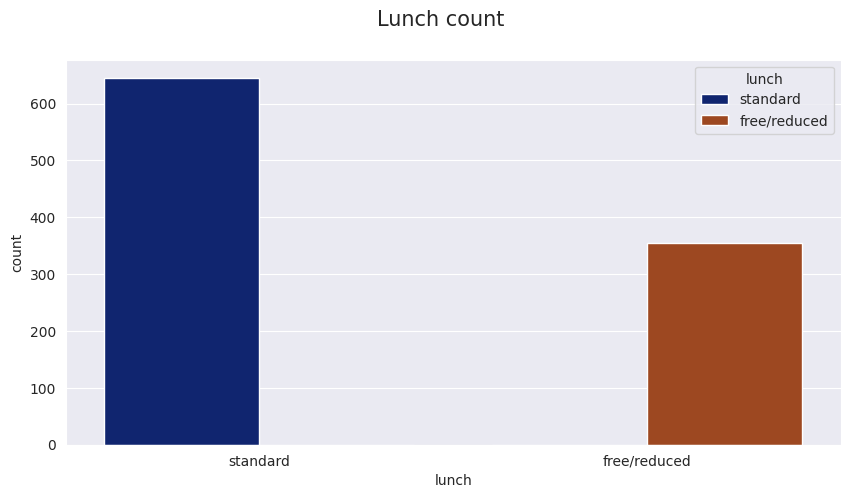

In [24]:
plt.figure(figsize=(10,5))
plt.suptitle('Lunch count', fontsize=15)

ax = sns.countplot(x='lunch', hue='lunch', data=df)

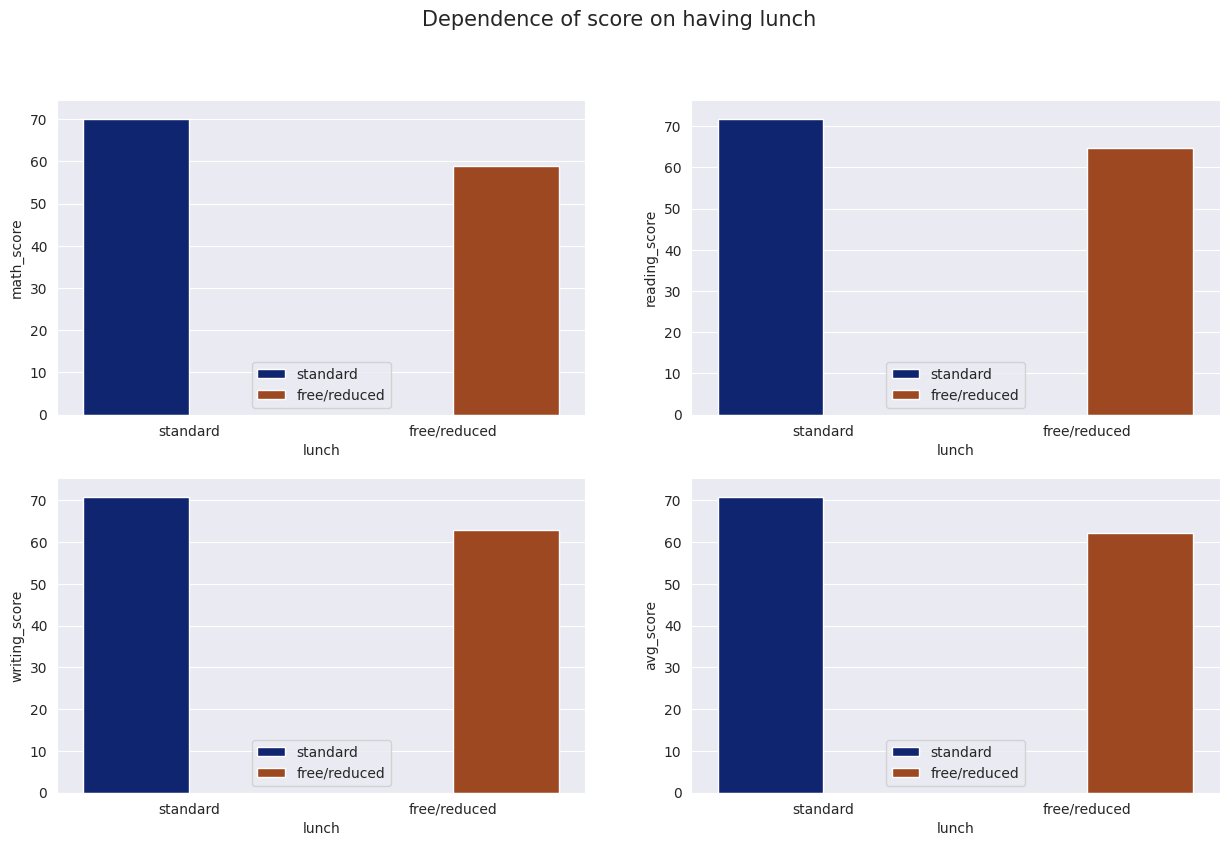

In [25]:
plt.figure(figsize=(15,9))
plt.suptitle('Dependence of score on having lunch', fontsize=15)

for i, col in enumerate(cols):
  plt.subplot(2, 2, i+1)
  ax = sns.barplot(x='lunch', y=col, hue='lunch', errwidth=0, data=df)
  plt.legend(loc='lower center')

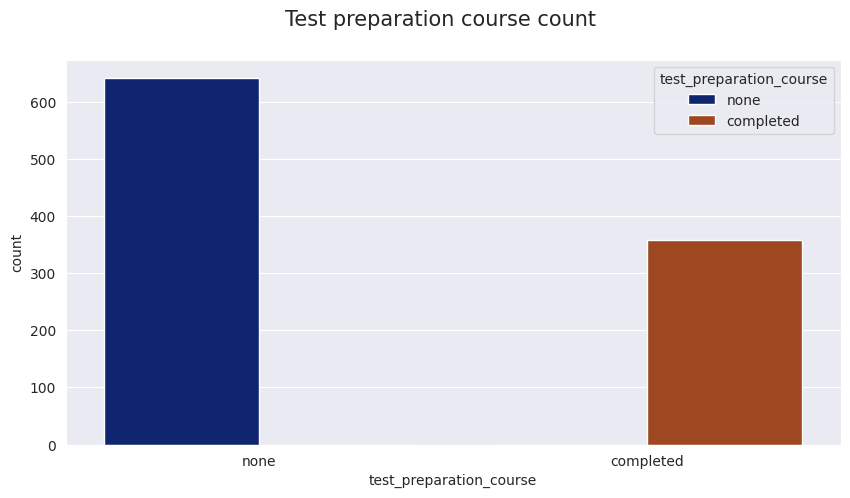

In [26]:
plt.figure(figsize=(10,5))
plt.suptitle('Test preparation course count', fontsize=15)

ax = sns.countplot(x='test_preparation_course', hue='test_preparation_course', data=df)

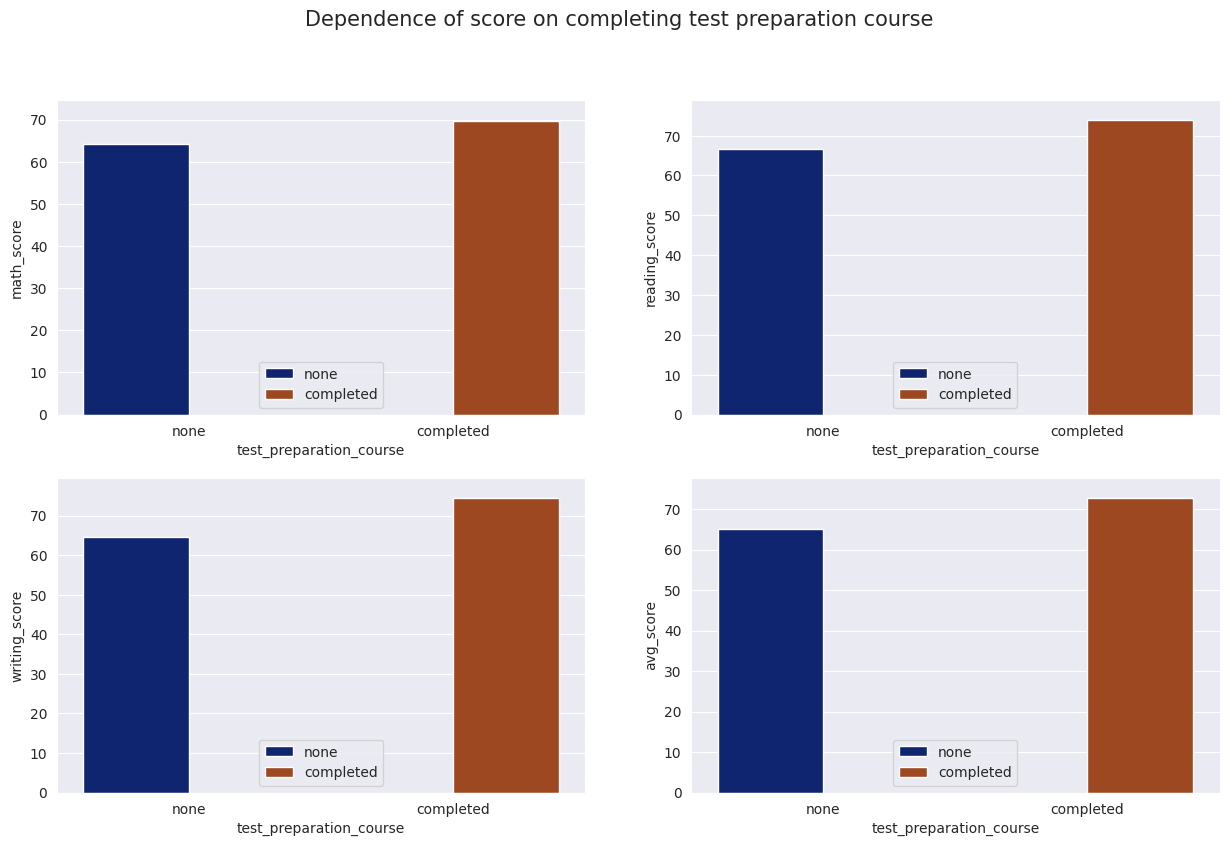

In [27]:
plt.figure(figsize=(15,9))
plt.suptitle('Dependence of score on completing test preparation course', fontsize=15)

for i, col in enumerate(cols):
  plt.subplot(2,2, i+1)
  ax = sns.barplot(x='test_preparation_course', y=col, hue='test_preparation_course', errwidth=0, data=df)
  plt.legend(loc='lower center')

In [28]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
